# 심음 dataset 살펴보기

In [1]:
import os
import pandas as pd
# 파일 위치는 개인별로 따로 설정 필요
#dataset = "/signal/physioNet-challenge-2022/the-circor-digiscope-phonocardiogram-dataset-1.0.3"
#dataset = "/Users/donghee/Library/CloudStorage/GoogleDrive-4c4448@gmail.com/.shortcut-targets-by-id/1K1dy6GjcHmDja5imZw_lx4vybvmWoTwC/aiffelthon_heartsignal/HeartSignal/notebooks/the-circor-digiscope-phonocardiogram-dataset-1.0.3"
dataset = "/home/ubuntu/HeartSignal/data/the-circor-digiscope-phonocardiogram-dataset-1.0.3"
training_data = os.path.join(dataset,"training_data")

In [2]:
training_data

'/home/ubuntu/HeartSignal/data/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data'

# 전체 데이터 갯수 확인

In [3]:
# 주어진 디렉토리에서 특정 확장자를 가진 모든 파일을 나열합니다.
def list_files(directory, extension):
    all_files = os.listdir(directory)
    hea_files = [file for file in all_files if file.endswith(extension)]
    return hea_files

In [4]:
wav_files = list_files(training_data, '.wav')
tsv_files = list_files(training_data, '.tsv')
hea_files = list_files(training_data, '.hea')
txt_files = list_files(training_data, '.txt') # 환자 정보는 전체 3164명 중 942명, 약 29.78%만 존재
len(wav_files), len(hea_files), len(tsv_files), len(txt_files)

(3162, 3162, 3162, 942)

In [5]:
import os
import re
from collections import Counter

# 파일 이름에서 첫 번째로 발견되는 숫자 추출
def extract_numbers(filename):
    match = re.search(r'\d+', filename)
    return match.group()

# 파일 이름을 숫자로 매핑
files = os.listdir(training_data)
number_tuples = [extract_numbers(file) for file in files]
print(len(set(number_tuples)))

942


In [6]:
# txt파일과 환자 ID개수가 동일한 부분 확인

In [7]:
import matplotlib.pyplot as plt

#    주어진 파일들의 각 라인 수를 계산합니다.
def count_lines_in_files(file_paths):
    line_counts = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            line_counts.append(len(lines))
    return line_counts

#    라인 수 분포를 막대그래프로 표시합니다.
def plot_line_distribution(line_counts):
    plt.figure(figsize=(10, 6))
    plt.hist(line_counts, bins=range(min(line_counts), max(line_counts) + 1, 1), alpha=0.7, color='blue', edgecolor='black')
    plt.title('HEA 파일 별 라인 수 분포')
    plt.xlabel('라인 수')
    plt.ylabel('파일 수')
    plt.show()

In [8]:
# 각 파일의 전체 경로 얻기
full_paths_hea = [os.path.join(training_data, file) for file in hea_files]
full_paths_wav = [os.path.join(training_data, file) for file in wav_files]
full_paths_tsv = [os.path.join(training_data, file) for file in tsv_files]
full_paths_txt = [os.path.join(training_data, file) for file in txt_files]

# `.hea` 파일 분석

In [9]:
import wfdb
print(wfdb.__version__)

4.1.2


In [10]:
import wfdb
import os

# 파일 경로에서 디렉토리와 기본 레코드 이름 분리
dir_name, base_record_name = os.path.split(full_paths_hea[1])
# 파일 확장자 제거
base_record_name = os.path.splitext(base_record_name)[0]
# training_data 디렉토리와 base_record_name을 안전하게 결합
full_path = os.path.join(training_data, base_record_name)
# 헤더 파일 읽기
record_1 = wfdb.rdheader(full_path)
# 읽은 정보 출력
print(record_1.__dict__)

{'record_name': '85064_AV', 'n_sig': 1, 'fs': 4000, 'counter_freq': None, 'base_counter': None, 'sig_len': 81408, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['AV'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['85064_AV.wav'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [44], 'adc_gain': [1.0], 'baseline': [0], 'units': ['mV'], 'adc_res': [16], 'adc_zero': [0], 'init_value': [0], 'checksum': [0], 'block_size': [0]}


In [11]:
def read_and_format_hea(file_path):
    # 파일 확장자 제거 및 기본 파일 이름 추출
    dir_name, base_record_name = os.path.split(file_path)
    base_record_name = os.path.splitext(base_record_name)[0]

    # wfdb를 사용하여 헤더 파일 읽기
    record = wfdb.rdheader(os.path.join(dir_name, base_record_name))

    # 일반 정보 포맷팅
    formatted_general_info = (
        f"File ID: {record.record_name}\n"
        f"Number of signals: {record.n_sig}\n"
        f"Sampling rate: {record.fs} Hz\n"
        f"Total samples: {record.sig_len}"
    )

    # 채널 정보 포맷팅
    formatted_channel_info = "Channel information:\n"
    for i in range(record.n_sig):
        formatted_channel_info += (
            f"Channel {i}\n"
            f"Signal name: {record.sig_name[i]}\n"
            f"File name: {record.file_name[i]}\n"
            f"Format: {record.fmt[i]}\n"
            f"ADC gain: {record.adc_gain[i]}\n"
            f"Baseline: {record.baseline[i]}\n"
            f"Units: {record.units[i]}\n"
            f"ADC resolution: {record.adc_res[i]}\n"
            f"ADC zero: {record.adc_zero[i]}\n"
        )

    # 포맷된 정보 반환
    return f"{formatted_general_info}\n\n{formatted_channel_info}"

# full_paths_hea 리스트의 두 번째 파일에서 데이터 읽기 및 포맷팅
formatted_data = read_and_format_hea(full_paths_hea[1])

# 포맷된 데이터 출력
print(formatted_data)

File ID: 85064_AV
Number of signals: 1
Sampling rate: 4000 Hz
Total samples: 81408

Channel information:
Channel 0
Signal name: AV
File name: 85064_AV.wav
Format: 16
ADC gain: 1.0
Baseline: 0
Units: mV
ADC resolution: 16
ADC zero: 0



# `.tsv` 파일 분석

In [12]:
# tsv 파일 리더 함수
def read_and_format_tsv(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
        return format_tsv_data(data)

def format_tsv_data(data):
    lines = data.strip().split('\n')

    # 각 열의 최대 너비 계산
    max_widths = [0, 0, 0]
    for line in lines:
        if line:
            parts = line.split('\t')
            for i, part in enumerate(parts):
                max_widths[i] = max(max_widths[i], len(part))

    # 제목 행 추가
    formatted_data = f"{'시작 시간'.ljust(max_widths[0])}\t{'끝 시간'.ljust(max_widths[1])}\t{'레이블'.ljust(max_widths[2])}\n"

    # 데이터 포맷팅
    for line in lines:
        if line:
            parts = line.split('\t')
            formatted_line = '\t'.join(part.ljust(max_widths[i]) for i, part in enumerate(parts))
            formatted_data += formatted_line + '\n'

    return formatted_data

formatted_tsv = read_and_format_tsv(full_paths_tsv[0])
print(formatted_tsv)

시작 시간   	끝 시간    	레이블
0       	0.88025 	0
0.88025 	1.00025 	1
1.00025 	1.151917	2
1.151917	1.24025 	3
1.24025 	1.46025 	4
1.46025 	1.58025 	1
1.58025 	1.72025 	2
1.72025 	1.82025 	3
1.82025 	2.02025 	4
2.02025 	2.14025 	1
2.14025 	2.28025 	2
2.28025 	2.36025 	3
2.36025 	2.54025 	4
2.54025 	2.66025 	1
2.66025 	2.82025 	2
2.82025 	2.90025 	3
2.90025 	3.12025 	4
3.12025 	3.24025 	1
3.24025 	3.38025 	2
3.38025 	3.48025 	3
3.48025 	3.68025 	4
3.68025 	3.80025 	1
3.80025 	3.94025 	2
3.94025 	4.02025 	3
4.02025 	4.22025 	4
4.22025 	4.34025 	1
4.34025 	4.48025 	2
4.48025 	4.56025 	3
4.56025 	4.76025 	4
4.76025 	4.88025 	1
4.88025 	5.04025 	2
5.04025 	5.14025 	3
5.14025 	5.34025 	4
5.34025 	5.44025 	1
5.44025 	5.58025 	2
5.58025 	5.68025 	3
5.68025 	5.88025 	4
5.88025 	6.00025 	1
6.00025 	6.14025 	2
6.14025 	6.22025 	3
6.22025 	6.42025 	4
6.42025 	6.54025 	1
6.54025 	6.68025 	2
6.68025 	6.76025 	3
6.76025 	6.96025 	4
6.96025 	7.08025 	1
7.08025 	7.22025 	2
7.22025 	7.32025 	3
7.32025 	7.52025 	

In [13]:
from io import StringIO

In [14]:
from io import StringIO

label_duration = []

# tsv 파일을 읽고 레이블 지속 시간을 계산합니다.
for i in range(len(full_paths_tsv)):
    formatted_tsv = read_and_format_tsv(full_paths_tsv[i])
    data_io = StringIO(formatted_tsv)
    df = pd.read_csv(data_io, sep='\t')
    
    start_column = df[list(df)[0]] # 시작시간
    end_column = df[list(df)[1]] # 끝시간
    label_column = df[list(df)[2]] # 레이블
    
    if label_column[0] == 0:
        if label_column.iloc[-1]==0:
            label_duration.append(end_column.iloc[-2]-start_column[1])
        else:
            label_duration.append(end_column.iloc[-1]-start_column[1])
    else:
        if label_column.iloc[-1]==0:
            label_duration.append(end_column.iloc[-2]-start_column[0])
        else:
            label_duration.append(end_column.iloc[-1]-start_column[0])

In [15]:
import numpy as np
# label duration의 평균, 최소, 최대, 표준편차를 계산합니다.
#pd.Series(label_duration).describe()
np.where(np.array(label_duration) < 2)

(array([1429, 1510, 1532, 1671, 1695, 2161, 2700, 2877]),)

(array([  8., 329., 447., 426., 384., 257., 255., 230., 169., 181.,  91.,
         60.,  58.,  89., 103.,  47.,   8.,   9.,   2.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60., 62., 64.]),
 <BarContainer object of 32 artists>)

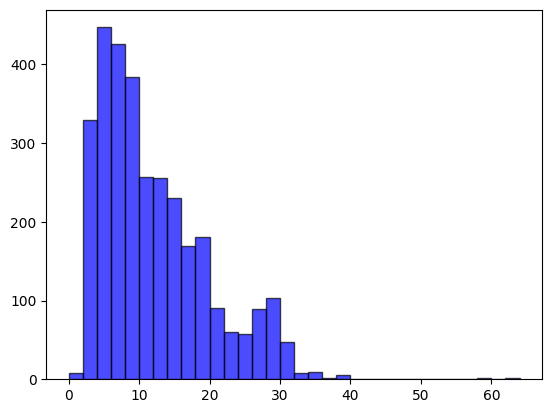

In [16]:
# 레이블 지속 시간 분포를 히스토그램으로 표시합니다.
import matplotlib.pyplot as plt
plt.hist(label_duration, bins=range(0, 65, 2), alpha=0.7, color='blue', edgecolor='black')

# `.txt` 파일 분석

In [17]:
# txt 파일 리더 함수
def read_and_format_txt(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
        return format_txt_data(data)

def format_txt_data(data):
    lines = data.strip().split('\n')
    formatted_data = ""

    # 파일 관련 정보와 환자 정보를 분리
    file_info = lines[:5]  # 처음 네 줄은 파일 정보
    patient_info = lines[5:]  # 그 이후는 환자 정보

    # 파일 정보 포맷팅
    formatted_data += "파일 정보:\n"
    for info in file_info:
        formatted_data += f"- {info}\n"

    # 환자 정보 포맷팅
    formatted_data += "\n환자 정보:\n"
    for info in patient_info:
        if info.startswith('#'):  # 주석 처리된 줄 확인
            info = info.lstrip('#').strip()  # '#' 제거 및 양쪽 공백 제거
            key, value = info.split(': ')
            formatted_data += f"- {key}: {value}\n"

    return formatted_data

# 사용 예시 (파일 읽기 및 포맷팅)
formatted_txt = read_and_format_txt(full_paths_txt[0])
print(formatted_txt)

파일 정보:
- 85210 4 4000
- AV 85210_AV.hea 85210_AV.wav 85210_AV.tsv
- PV 85210_PV.hea 85210_PV.wav 85210_PV.tsv
- TV 85210_TV.hea 85210_TV.wav 85210_TV.tsv
- MV 85210_MV.hea 85210_MV.wav 85210_MV.tsv

환자 정보:
- Age: Child
- Sex: Female
- Height: 112.0
- Weight: 18.6
- Pregnancy status: False
- Murmur: Absent
- Murmur locations: nan
- Most audible location: nan
- Systolic murmur timing: nan
- Systolic murmur shape: nan
- Systolic murmur grading: nan
- Systolic murmur pitch: nan
- Systolic murmur quality: nan
- Diastolic murmur timing: nan
- Diastolic murmur shape: nan
- Diastolic murmur grading: nan
- Diastolic murmur pitch: nan
- Diastolic murmur quality: nan
- Outcome: Normal
- Campaign: CC2015
- Additional ID: nan



# `.wav` 파일 분석

In [18]:
import torchaudio

# 메타 정보 출력 함수
def print_audio_info(file_path):
    # 오디오 파일 로드
    waveform, sample_rate = torchaudio.load(file_path)

    # 메타데이터 정보 로드
    metadata = torchaudio.info(file_path)

    # 메타데이터 정보 출력
    print(f"파일: {file_path}")
    print(f"샘플 레이트: {metadata.sample_rate}Hz")
    print(f"채널 수: {metadata.num_channels}")
    print(f"프레임 수: {metadata.num_frames}")
    print(f"비트 깊이: {metadata.bits_per_sample}")
    print(f"인코딩: {metadata.encoding}")

# 오디오 파일 메타데이터 출력
print_audio_info(full_paths_wav[0])

파일: /home/ubuntu/HeartSignal/data/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50336_MV.wav
샘플 레이트: 4000Hz
채널 수: 1
프레임 수: 116160
비트 깊이: 16
인코딩: PCM_S


In [11]:
full_paths_wav[0]

'/home/ubuntu/HeartSignal/data/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50336_MV.wav'

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import IPython.display as ipd

In [35]:
idx=12
wavfile = full_paths_wav[idx]
print(wavfile)
waveform, sr = librosa.load(wavfile)
ipd.display(ipd.Audio(waveform, rate=sr))

# 저장할 음성 데이터
original_data = waveform # 예시로 원본 오디오 데이터를 그대로 사용합니다.
# 저장할 파일 경로 및 파일명
output_file = 'original_audio.wav'

sf.write(output_file, original_data, sr)

/home/ubuntu/HeartSignal/data/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50652_AV.wav


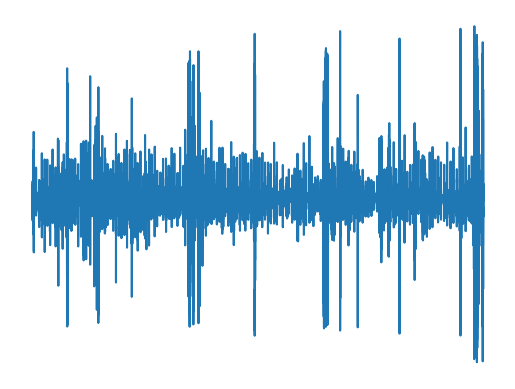

In [29]:
plt.plot(waveform)
plt.axis('off')
plt.savefig('waveform.png')

In [31]:
import torch, torchaudio

waveform = librosa.resample(waveform, orig_sr=sr, target_sr=8000)
waveform = torch.from_numpy(waveform)
for _ in range(5):
    waveform = torchaudio.functional.lowpass_biquad(waveform, 8000, cutoff_freq=500, Q=0.707)
waveform = np.array(waveform.numpy())

# 4. Z-score normalization
waveform = librosa.util.normalize(waveform)

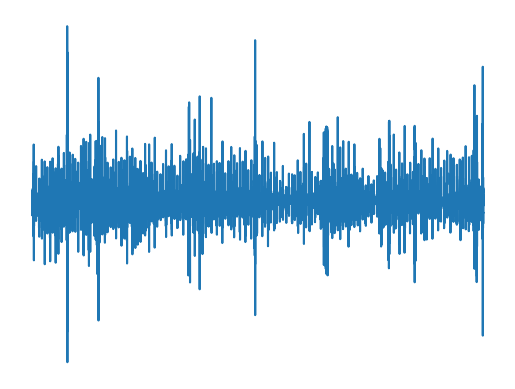

In [34]:
plt.plot(waveform)
plt.axis('off')
plt.savefig('processed_waveform.png')
ipd.display(ipd.Audio(waveform, rate=8000))

In [33]:
import soundfile as sf
# 저장할 음성 데이터
processed_audio = waveform # 예시로 원본 오디오 데이터를 그대로 사용합니다.
# 저장할 파일 경로 및 파일명
output_file = 'processed_audio.wav'

# WAV 형식으로 음성 데이터 저장
sf.write(output_file, processed_audio, 8000)